In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tushar5harma_plant_village_dataset_updated_path = kagglehub.dataset_download('tushar5harma/plant-village-dataset-updated')

print('Data source import complete.')


Data source import complete.


🌱 Complete Crop Disease Detection & Plant Identification System 🌱
Found 9 plant types: ['Tomato', 'Apple', 'Bell Pepper', 'Strawberry', 'Corn (Maize)', 'Peach', 'Grape', 'Cherry', 'Potato']

🦠 PHASE 1: Training Disease Detection Models

Training Disease Detection Model for Tomato
Diseases found: ['Early Blight', 'Bacterial Spot', 'Septoria Leaf Spot', 'Healthy', 'Late Blight', 'Yellow Leaf Curl Virus']
Number of disease classes: 6
Found 11108 images belonging to 6 classes.
Found 2495 images belonging to 6 classes.
Found 280 images belonging to 6 classes.

Starting training for Tomato...
Epoch 1/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4240 - loss: 1.7003
Epoch 1: val_accuracy improved from -inf to 0.84489, saving model to Tomato_Disease_Model_best.keras
174/174 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.4249 - loss: 1.6974 - val_accuracy: 0.8449 - val_loss: 0.4530 - learning_rate: 1.0000e-04
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7881 - lo

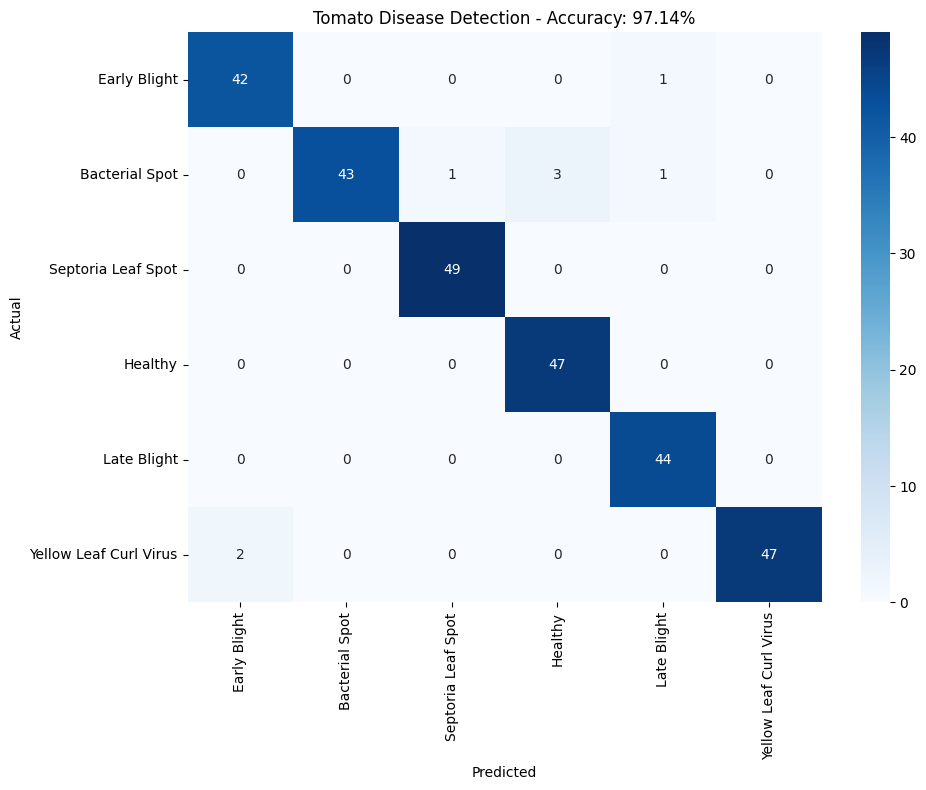


Classification Report for Tomato:
                        precision    recall  f1-score   support

          Early Blight       0.95      0.98      0.97        43
        Bacterial Spot       1.00      0.90      0.95        48
    Septoria Leaf Spot       0.98      1.00      0.99        49
               Healthy       0.94      1.00      0.97        47
           Late Blight       0.96      1.00      0.98        44
Yellow Leaf Curl Virus       1.00      0.96      0.98        49

              accuracy                           0.97       280
             macro avg       0.97      0.97      0.97       280
          weighted avg       0.97      0.97      0.97       280



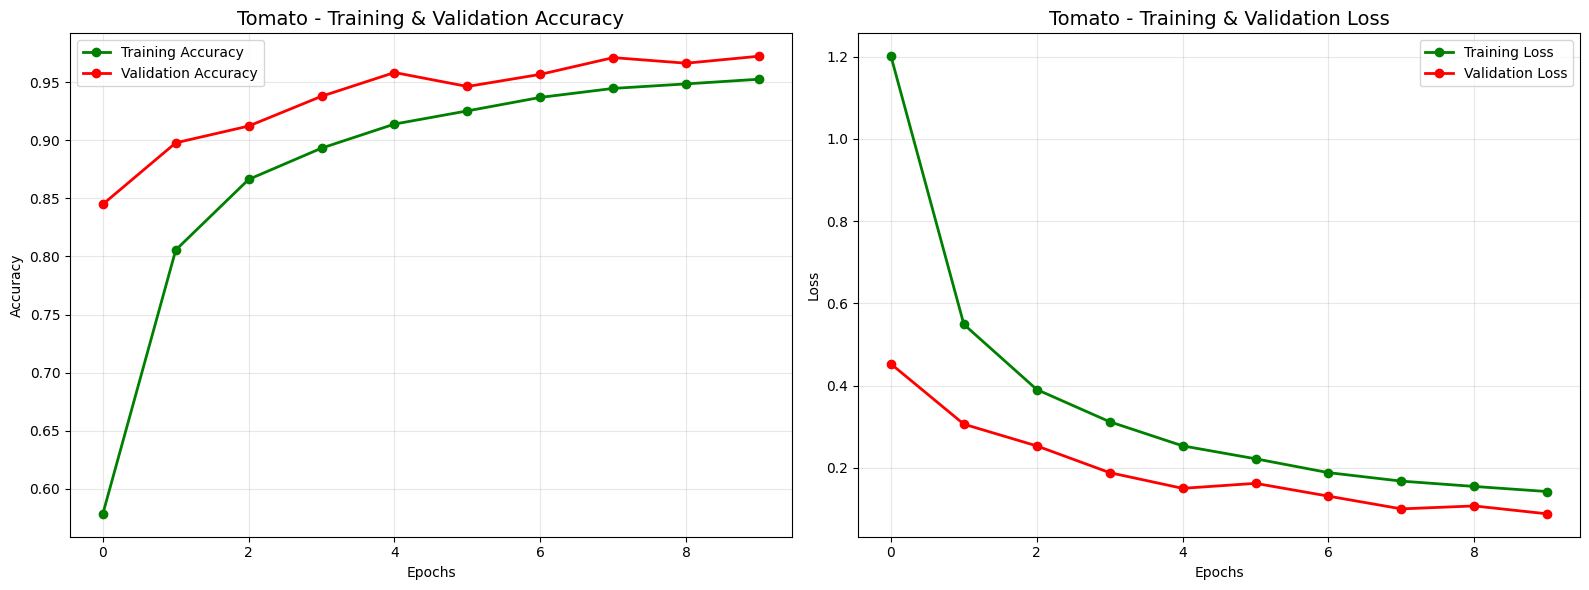

✅ Tomato disease model completed with 97.14% accuracy

Training Disease Detection Model for Apple
Diseases found: ['Healthy', 'Apple Scab', 'Cedar Apple Rust', 'Black Rot']
Number of disease classes: 4
Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
Found 196 images belonging to 4 classes.

Starting training for Apple...
Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5569 - loss: 1.1840
Epoch 1: val_accuracy improved from -inf to 0.93589, saving model to Apple_Disease_Model_best.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.5582 - loss: 1.1805 - val_accuracy: 0.9359 - val_loss: 0.2028 - learning_rate: 1.0000e-04
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9042 - loss: 0.2797
Epoch 2: val_accuracy improved from 0.93589 to 0.97310, saving model to Apple_Disease_Model_best.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9043 - loss: 0.2794 - val_accuracy: 0.9731 - val_loss: 0.0940 - le

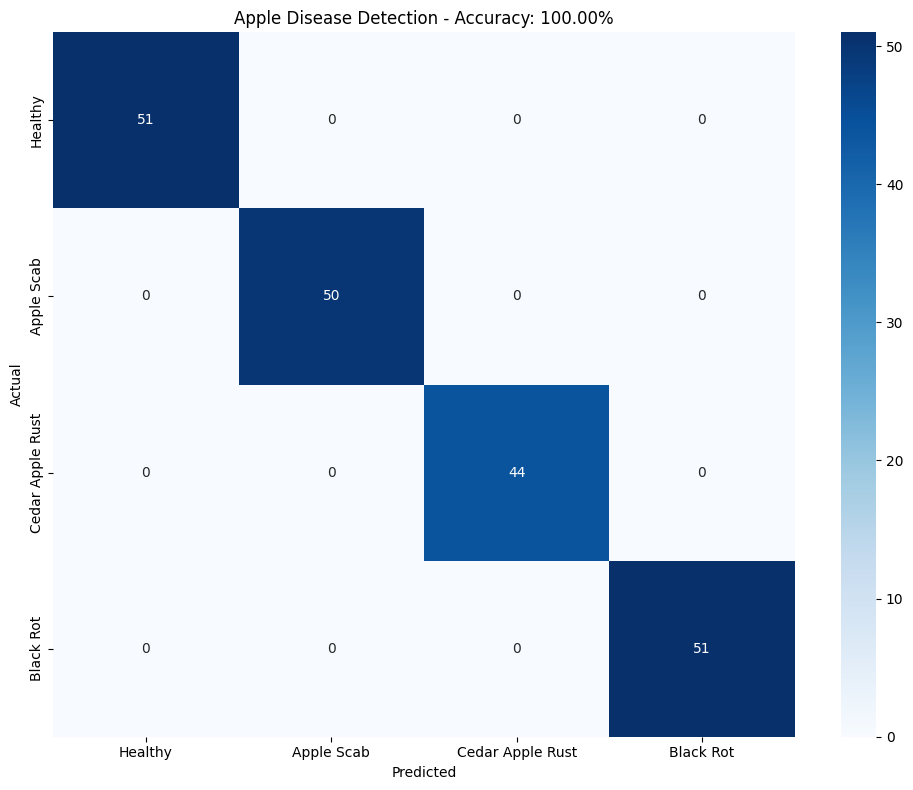


Classification Report for Apple:
                  precision    recall  f1-score   support

         Healthy       1.00      1.00      1.00        51
      Apple Scab       1.00      1.00      1.00        50
Cedar Apple Rust       1.00      1.00      1.00        44
       Black Rot       1.00      1.00      1.00        51

        accuracy                           1.00       196
       macro avg       1.00      1.00      1.00       196
    weighted avg       1.00      1.00      1.00       196



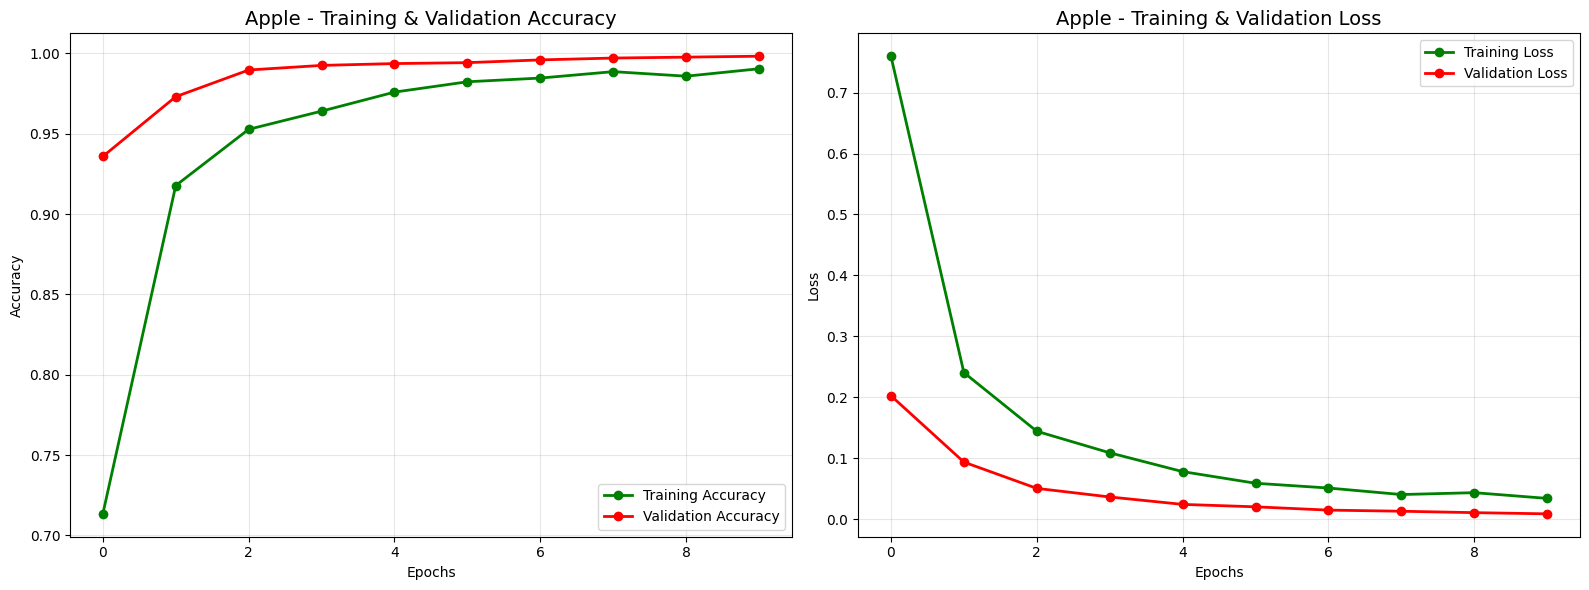

✅ Apple disease model completed with 100.00% accuracy

Training Disease Detection Model for Bell Pepper
Diseases found: ['Bacterial Spot', 'Healthy']
Number of disease classes: 2
Found 3901 images belonging to 2 classes.
Found 877 images belonging to 2 classes.
Found 98 images belonging to 2 classes.

Starting training for Bell Pepper...
Epoch 1/10
❌ Error training Bell Pepper model: 'Bell Pepper_Disease_Model' is not a valid root scope name. A root scope name has to match the following pattern: ^[A-Za-z0-9.][A-Za-z0-9_.\\/>-]*$

Training Disease Detection Model for Strawberry
Diseases found: ['Leaf Scorch', 'Healthy']
Number of disease classes: 2
Found 3598 images belonging to 2 classes.
Found 809 images belonging to 2 classes.
Found 91 images belonging to 2 classes.

Starting training for Strawberry...
Epoch 1/10
❌ Error training Strawberry model: 'Bell Pepper_Disease_Model_dense_6_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-

In [ ]:
# Complete Crop Disease Detection & Plant Identification System
# This script creates models for all crops and a plant identification model

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.python.client import device_lib
import os
from tensorflow.keras.utils import image_dataset_from_directory
from matplotlib import pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageEnhance
import random
import cv2
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import tensorflow_hub as hub
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

# Configuration
BASE_PATH = tushar5harma_plant_village_dataset_updated_path
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 10

def get_path(plant_dir: str, dir_test: str):
    """Get the path for folder paths"""
    if dir_test == 'Test':
        return BASE_PATH + '/' + plant_dir + '/Test'
    elif dir_test == 'Train':
        return BASE_PATH + '/' + plant_dir + '/Train'
    elif dir_test == 'Valid':
        return BASE_PATH + '/' + plant_dir + '/Val'

def create_data_generators():
    """Create data generators with augmentation"""
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_test_datagen = ImageDataGenerator(rescale=1./255)

    return train_datagen, val_test_datagen
vit_model = hub.load("https://tfhub.dev/sayakpaul/vit_r50_l32_fe/1")

def vit_features(x):
    return vit_model(x)
def build_vit_model(num_classes, model_name):
    """Build a ViT-based classification model using Functional API."""
    # Define input
    inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3), name="input_image")
    x = layers.Lambda(vit_features, name="vit_feature_extractor")(inputs)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="output_layer")(x)

    # Build the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=model_name)

    model.compile(
        loss="categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        metrics=["accuracy"]
    )

    return model


def create_callbacks(model_name):
    """Create callbacks for training"""
    callbacks = [
        ModelCheckpoint(
            f'{model_name}_best.keras',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        ),
        EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1
        )
    ]
    return callbacks

def train_disease_model(plant_name):
    """Train disease detection model for a specific plant"""
    print(f"\n{'='*60}")
    print(f"Training Disease Detection Model for {plant_name}")
    print(f"{'='*60}")

    # Set paths
    train_path = f"{BASE_PATH}/{plant_name}/Train"
    val_path = f"{BASE_PATH}/{plant_name}/Val"
    test_path = f"{BASE_PATH}/{plant_name}/Test"

    # Get disease labels
    disease_labels = os.listdir(train_path)
    num_diseases = len(disease_labels)

    print(f"Diseases found: {disease_labels}")
    print(f"Number of disease classes: {num_diseases}")

    # Create data generators
    train_datagen, val_test_datagen = create_data_generators()

    # Create data flows
    train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical'
    )

    val_set = val_test_datagen.flow_from_directory(
        val_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode='categorical'
    )

    test_set = val_test_datagen.flow_from_directory(
        test_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode='categorical'
    )

    # Build model
    model_name = f"{plant_name}_Disease_Model"
    model = build_vit_model(num_diseases, model_name)

    # Create callbacks
    callbacks = create_callbacks(model_name)

    # Train model
    print(f"\nStarting training for {plant_name}...")
    history = model.fit(
        train_set,
        epochs=EPOCHS,
        validation_data=val_set,
        steps_per_epoch=len(train_set),
        validation_steps=len(val_set),
        callbacks=callbacks,
        verbose=1
    )

    # Save final model
    model.save(f"{model_name}_final.keras")

    # Evaluate on test set
    print(f"\nEvaluating {plant_name} model on test set...")
    test_loss, test_accuracy = model.evaluate(test_set, verbose=0)
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")

    # Generate predictions for confusion matrix
    Y_pred = model.predict(test_set, steps=len(test_set))
    y_pred = np.argmax(Y_pred, axis=1)

    # Plot confusion matrix
    cf = confusion_matrix(test_set.classes, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',
                xticklabels=disease_labels, yticklabels=disease_labels)
    plt.title(f'{plant_name} Disease Detection - Accuracy: {test_accuracy*100:.2f}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'{plant_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Classification report
    print(f"\nClassification Report for {plant_name}:")
    print("="*50)
    print(classification_report(test_set.classes, y_pred, target_names=disease_labels))

    # Plot training history
    plot_training_history(history, plant_name)

    return model, history, test_accuracy

def plot_training_history(history, plant_name):
    """Plot training history"""
    epochs_range = range(len(history.history['accuracy']))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Accuracy plot
    ax1.plot(epochs_range, history.history['accuracy'], 'go-', label='Training Accuracy', linewidth=2)
    ax1.plot(epochs_range, history.history['val_accuracy'], 'ro-', label='Validation Accuracy', linewidth=2)
    ax1.set_title(f'{plant_name} - Training & Validation Accuracy', fontsize=14)
    ax1.legend()
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.grid(True, alpha=0.3)

    # Loss plot
    ax2.plot(epochs_range, history.history['loss'], 'g-o', label='Training Loss', linewidth=2)
    ax2.plot(epochs_range, history.history['val_loss'], 'r-o', label='Validation Loss', linewidth=2)
    ax2.set_title(f'{plant_name} - Training & Validation Loss', fontsize=14)
    ax2.legend()
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{plant_name}_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_plant_identification_dataset():
    """Create dataset for plant identification (not disease-specific)"""
    print(f"\n{'='*60}")
    print("Creating Plant Identification Dataset")
    print(f"{'='*60}")

    plant_dirs = os.listdir(BASE_PATH)
    print(f"Plants available: {plant_dirs}")

    # Create combined dataset for plant identification
    train_datagen, val_test_datagen = create_data_generators()

    # We'll create a custom dataset by sampling from each plant's images
    all_images = []
    all_labels = []

    for plant_idx, plant in enumerate(plant_dirs):
        plant_train_path = f"{BASE_PATH}/{plant}/Train"

        # Get all disease folders for this plant
        disease_folders = os.listdir(plant_train_path)

        for disease_folder in disease_folders:
            disease_path = os.path.join(plant_train_path, disease_folder)
            image_files = os.listdir(disease_path)

            # Sample images from each disease folder
            sample_size = min(2000, len(image_files))  # Limit per disease to balance dataset
            sampled_images = random.sample(image_files, sample_size)

            for img_file in sampled_images:
                all_images.append(os.path.join(disease_path, img_file))
                all_labels.append(plant_idx)  # Plant index as label

    return all_images, all_labels, plant_dirs

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess image"""
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])  # Ensure rank 3
        image = tf.image.resize(image, target_size)
        image = tf.cast(image, tf.float32) / 255.0
        if len(image.shape) != 3:
            print(f"Warning: Invalid image shape {image.shape} {image_path}")
        return image
    except:
        return tf.zeros((target_size[0], target_size[1], 3), dtype=tf.float32)

def create_tf_dataset(image_paths, labels, num_classes, is_training=False):
    """Create a TensorFlow dataset from image paths and labels"""
    def process_path_label(path, label):
        # Load and preprocess image
        image = load_and_preprocess_image(path)
        # Convert label to one-hot
        label_onehot = tf.one_hot(label, num_classes)
        return image, label_onehot
    print(1)
    # Create dataset from paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    print(2)
    # Map the processing function
    dataset = dataset.map(
        process_path_label,
        num_parallel_calls=tf.data.AUTOTUNE,
        deterministic=not is_training
    )
    print(3)
    # Filter out any invalid samples (though we handle errors in load_and_preprocess_image)
    dataset = dataset.filter(lambda x, y: tf.reduce_all(tf.math.is_finite(x)))
    print(4)
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000)
    print(5)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    # print(dataset.head())

    return dataset

def create_plant_identification_model(plant_dirs):
    """Create and train plant identification model"""
    print(f"\n{'='*60}")
    print("Training Plant Identification Model")
    print(f"{'='*60}")

    # Get dataset
    all_images, all_labels, plant_names = create_plant_identification_dataset()
    num_plants = len(plant_names)

    print(f"Total images collected: {len(all_images)}")
    print(f"Number of plant classes: {num_plants}")

    # Create TensorFlow dataset
    def load_and_preprocess_path_label(path, label):
        image = load_and_preprocess_image(path)
        return image, tf.one_hot(label, num_plants)

    # Shuffle and split data
    combined = list(zip(all_images, all_labels))
    random.shuffle(combined)
    all_images, all_labels = zip(*combined)
    all_images = list(all_images)
    all_labels = list(all_labels)

    print(all_labels)

    # Split into train, val, test
    train_size = int(0.7 * len(all_images))
    val_size = int(0.15 * len(all_images))

    train_paths = all_images[:train_size]
    train_labels = all_labels[:train_size]
    val_paths = all_images[train_size:train_size+val_size]
    val_labels = all_labels[train_size:train_size+val_size]
    test_paths = all_images[train_size+val_size:]
    test_labels = all_labels[train_size+val_size:]

    train_dataset = create_tf_dataset(train_paths, train_labels, num_plants, is_training=True)
    val_dataset = create_tf_dataset(val_paths, val_labels, num_plants, is_training=False)
    test_dataset = create_tf_dataset(test_paths, test_labels, num_plants, is_training=False)

    # Build model
    model_name = "Plant_Identification_Model"
    model = build_vit_model(num_plants, model_name)

    # Create callbacks
    callbacks = create_callbacks(model_name)

    # Train model
    print(f"\nStarting training for Plant Identification...")
    history = model.fit(
        train_dataset,
        epochs=EPOCHS,
        validation_data=val_dataset,
        callbacks=callbacks,
        verbose=1
    )

    # Save model
    model.save(f"{model_name}_final.keras")

    # Evaluate
    print(f"\nEvaluating Plant Identification model...")
    test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"Plant Identification Test Accuracy: {test_accuracy*100:.2f}%")

    # Generate predictions for confusion matrix
    y_true = []
    y_pred = []

    for batch_images, batch_labels in test_dataset:
        predictions = model.predict(batch_images, verbose=0)
        y_true.extend(np.argmax(batch_labels.numpy(), axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    # Plot confusion matrix
    cf = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',
                xticklabels=plant_names, yticklabels=plant_names)
    plt.title(f'Plant Identification - Accuracy: {test_accuracy*100:.2f}%')
    plt.xlabel('Predicted Plant')
    plt.ylabel('Actual Plant')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('Plant_Identification_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Classification report
    print(f"\nClassification Report for Plant Identification:")
    print("="*50)
    print(classification_report(y_true, y_pred, target_names=plant_names))

    # Plot training history
    plot_training_history(history, "Plant_Identification")

    return model, history, test_accuracy

def main():
    """Main function to run all model training"""
    print("🌱 Complete Crop Disease Detection & Plant Identification System 🌱")
    print("="*80)

    # Get all plant directories
    plant_dirs = [d for d in os.listdir(BASE_PATH) if os.path.isdir(os.path.join(BASE_PATH, d))]
    print(f"Found {len(plant_dirs)} plant types: {plant_dirs}")

    # Dictionary to store all models and results
    disease_models = {}
    results_summary = {}

    # Train disease detection models for each plant
    print(f"\n🦠 PHASE 1: Training Disease Detection Models")
    print("="*60)

    for plant in plant_dirs:
        try:
            model, history, accuracy = train_disease_model(plant)
            disease_models[plant] = model
            results_summary[f"{plant}_disease"] = accuracy
            print(f"✅ {plant} disease model completed with {accuracy*100:.2f}% accuracy")
        except Exception as e:
            print(f"❌ Error training {plant} model: {str(e)}")
            continue

    # Train plant identification model
    # print(f"\n🌿 PHASE 2: Training Plant Identification Model")
    # print("="*60)

    # try:
    #     plant_model, plant_history, plant_accuracy = create_plant_identification_model(plant_dirs)
    #     results_summary["plant_identification"] = plant_accuracy
    #     print(f"✅ Plant identification model completed with {plant_accuracy*100:.2f}% accuracy")
    # except Exception as e:
    #     print(f"❌ Error training plant identification model: {str(e)}")

    # # Summary of all results
    # print(f"\n📊 FINAL RESULTS SUMMARY")
    # print("="*60)
    # for model_name, accuracy in results_summary.items():
    #     print(f"{model_name:25}: {accuracy*100:6.2f}%")

    # # Create a comprehensive results visualization
    # create_results_summary_visualization(results_summary, plant_dirs)

    print(f"\n🎉 Training Complete!")
    print("="*60)
    print("All models have been trained and saved.")
    print("Check the generated plots and confusion matrices for detailed analysis.")

    return disease_models, results_summary

def create_results_summary_visualization(results_summary, plant_dirs):
    """Create a comprehensive visualization of all results"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Disease models accuracy
    disease_accuracies = [results_summary.get(f"{plant}_disease", 0) * 100
                         for plant in plant_dirs if f"{plant}_disease" in results_summary]
    disease_plants = [plant for plant in plant_dirs if f"{plant}_disease" in results_summary]

    if disease_accuracies:
        bars1 = ax1.bar(disease_plants, disease_accuracies, color='skyblue', edgecolor='navy', linewidth=1.5)
        ax1.set_title('Disease Detection Model Accuracies', fontsize=16, fontweight='bold')
        ax1.set_xlabel('Plant Types', fontsize=12)
        ax1.set_ylabel('Accuracy (%)', fontsize=12)
        ax1.set_ylim(0, 105)
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)

        # Add value labels on bars
        for bar, acc in zip(bars1, disease_accuracies):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Plant identification accuracy
    if "plant_identification" in results_summary:
        plant_id_acc = results_summary["plant_identification"] * 100
        bar2 = ax2.bar(['Plant Identification'], [plant_id_acc],
                       color='lightgreen', edgecolor='darkgreen', linewidth=2)
        ax2.set_title('Plant Identification Model Accuracy', fontsize=16, fontweight='bold')
        ax2.set_ylabel('Accuracy (%)', fontsize=12)
        ax2.set_ylim(0, 105)
        ax2.grid(True, alpha=0.3)

        # Add value label
        ax2.text(bar2[0].get_x() + bar2[0].get_width()/2, bar2[0].get_height() + 1,
                f'{plant_id_acc:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=14)

    plt.tight_layout()
    plt.savefig('Complete_Results_Summary.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run the complete system
if __name__ == "__main__":
    disease_models, results = main()

In [ ]:
print("ijewbiwb")